<a href="https://colab.research.google.com/github/Michaelzats/Stocks_and_Google_Trends_correlation_-_prediction.ipynb/blob/main/Stocks_and_Google_Trends_correlation_%2B_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pytrends finance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for finance: filename=finance-0.2502-py3-none-any.whl size=46534 sha256=dea191d35c7b1c0b2322f4e94b7edbd9ca545181a2f9cf5f781f9ccc41841ac4
  Stored in directory: /root/.cache/pip/wheels/be/99/d3/bd0c942c471c5fb446581cd524719e967eb613bc2359f69f0e
Successfully built finance


In [4]:
from pytrends import dailydata
import yfinance as fin
from datetime import datetime

# selecting ticker for yahoo finance
ticker = 'INTC' # which stock to search for
ticker_handle = fin.Ticker(ticker) # ticker handler
company_name = ticker_handle.info.get('shortName')

# getting 30 days of trend and finance data
t_now = datetime.now()
t_prev= datetime.fromtimestamp(t_now.timestamp()-(3600*24*30))
trends = dailydata.get_daily_data(company_name,t_prev.year,t_prev.month,
                                  t_now.year,t_now.month)
fin_data = fin.download(ticker,start=t_prev.strftime('%Y-%m-%d'),
                        end=t_now.strftime('%Y-%m-%d'))

print('Most Recent Stock Price for  on : $'.format(\
    company_name,fin_data.index[-1].strftime('%m-%d-%Y'),fin_data.values[-1,3]))
print('Most Recent Google Trend Data for  on : '.format(company_name,
                                                       trends.index[-1].strftime('%m-%d-%Y'),
                                                                      trends.values[-1,3]))


/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Intel Corporation:2024-10-01 2024-10-31
Intel Corporation:2024-11-01 2024-11-30


/usr/local/lib/python3.10/dist-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
/usr/local/lib/python3.10/dist-packages/pytrends/dailydata.py:123: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  complete[f'{word}_monthly'].ffill(inplace=True)  # fill NaN values

Most Recent Stock Price for  on : $
Most Recent Google Trend Data for  on : 


Apple:2019-01-01 2019-01-31
Apple:2019-02-01 2019-02-28
Apple:2019-03-01 2019-03-31
Apple:2019-04-01 2019-04-30
Apple:2019-05-01 2019-05-31
Apple:2019-06-01 2019-06-30
Apple:2019-07-01 2019-07-31
Apple:2019-08-01 2019-08-31
Apple:2019-09-01 2019-09-30
Apple:2019-10-01 2019-10-31
Apple:2019-11-01 2019-11-30
Apple:2019-12-01 2019-12-31
Apple:2020-01-01 2020-01-31
Apple:2020-02-01 2020-02-29
Apple:2020-03-01 2020-03-31
Apple:2020-04-01 2020-04-30
Apple:2020-05-01 2020-05-31
Apple:2020-06-01 2020-06-30
Apple:2020-07-01 2020-07-31
Apple:2020-08-01 2020-08-31
Apple:2020-09-01 2020-09-30
Apple:2020-10-01 2020-10-31
Apple:2020-11-01 2020-11-30
Apple:2020-12-01 2020-12-31
Apple:2021-01-01 2021-01-31
Apple:2021-02-01 2021-02-28
Apple:2021-03-01 2021-03-31
Apple:2021-04-01 2021-04-30
Apple:2021-05-01 2021-05-31
Apple:2021-06-01 2021-06-30
Apple:2021-07-01 2021-07-31
Apple:2021-08-01 2021-08-31
Apple:2021-09-01 2021-09-30
Apple:2021-10-01 2021-10-31
Apple:2021-11-01 2021-11-30
Apple:2021-12-01 202

/usr/local/lib/python3.10/dist-packages/pytrends/dailydata.py:123: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  complete[f'{word}_monthly'].ffill(inplace=True)  # fill NaN values
[*********************100%***********************]  1 of 1 completed
<ipython-input-6-2efba6857939>:62: RuntimeWarning: invalid value encountered in scalar divide
  corr_xy = (np.nansum(np.multiply((np.subtract(trend_y[0:ii],mean_x)),


TypeError: can only concatenate tuple (not "str") to tuple

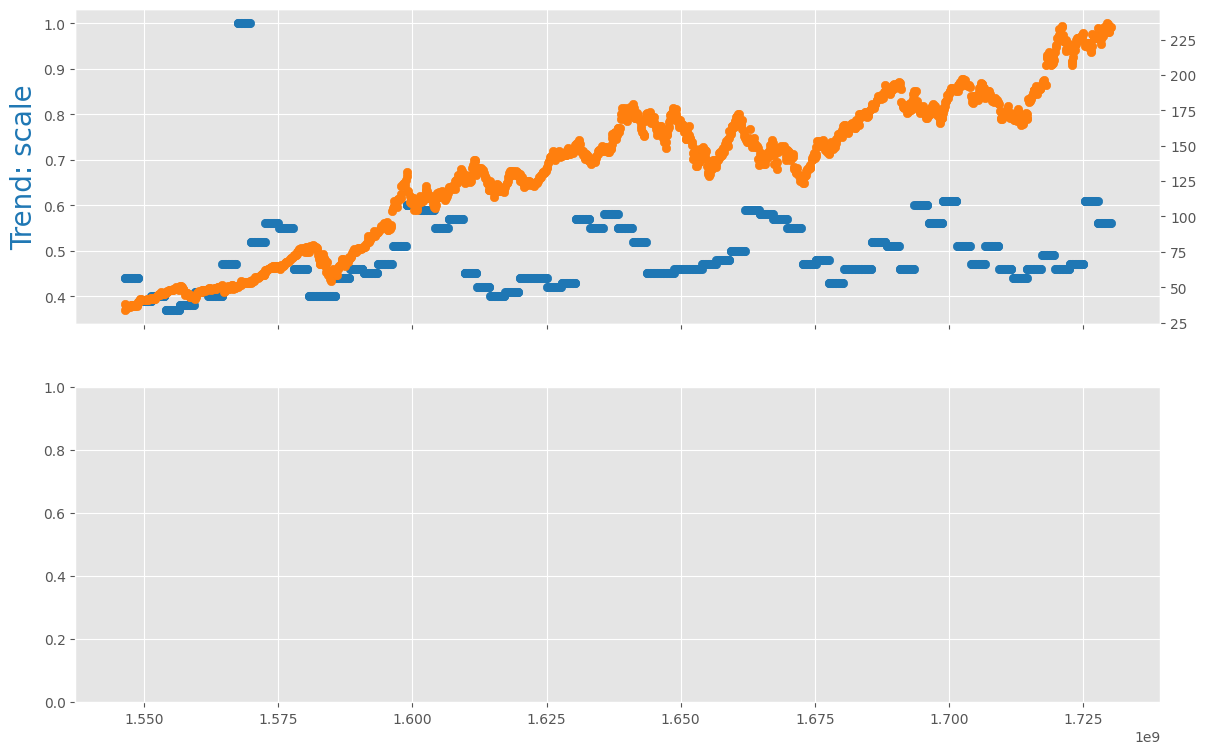

In [6]:
from pytrends import dailydata
import numpy as np
import matplotlib.pyplot as plt
import yfinance as fin
import datetime

#
######################################
# INPUTS
######################################
#
ticker = 'AAPL' # which stock to search for
date_range = [1,1,2019,10,30,2024] # date range of interest, format: 'month,day,year'
fin_indx = 0 #Prices: 0=Open,1=High,2=Low,3=Close,4=Adj Close,5=Volume
trend_indx = 3 #Popularity: 0=unscaled 0-100, 1=monthly, 2=isPartial, 3=scaled

#
######################################
# DATE AND DATA HANDLING
######################################
#
start_t = datetime.datetime(date_range[2],date_range[0],date_range[1])
end_t   = datetime.datetime(date_range[5],date_range[3],date_range[4])

ticker_handle = fin.Ticker(ticker)
trends = dailydata.get_daily_data(ticker_handle.info.get('shortName').split(' ')[0],
                                  date_range[2],date_range[0],
                                  date_range[5],date_range[3])

fin_data = fin.download(ticker,start=start_t.strftime('%Y-%m-%d'),
                        end=end_t.strftime('%Y-%m-%d'))

#
######################################
# Time aligning routines
######################################
#
fin_keys = fin_data.keys() # keys for naming plotted finance data
trend_keys = trends.keys() # keys for naming plotted trends data

fin_x   = [ii.timestamp() for ii in fin_data.index] # formatting dates into timestamp for plotting
fin_y   = (fin_data.values)[:,fin_indx] # trend data to plot

trend_x = [ii.timestamp() for ii in trends.index] # formatting dates into timestamp for plotting
trend_y = (trends.values)[:,trend_indx] # trend data to plot

trend_start_indx = np.argmin(np.abs(np.subtract(trend_x,fin_x[0])))
trend_end_indx   = np.argmin(np.abs(np.subtract(trend_x,fin_x[-1])))
trend_y = [trend_y[np.argmin(np.abs(np.subtract(ii,trend_x)))] for ii in fin_x] # align trends + stock $
trend_x = [trend_x[np.argmin(np.abs(np.subtract(ii,trend_x)))] for ii in fin_x] # align trends + stock $
#
#######################################
# correlation calculation
#######################################
#
corr_xy_array = [0.0]
for ii in range(1,len(fin_y)):
    mean_x = np.nanmean(trend_y[0:ii])
    mean_y = np.nanmean(fin_y[0:ii])
    sigma_x = np.sqrt(np.nansum(np.power(trend_y[0:ii]-mean_x,2.0)))
    sigma_y = np.sqrt(np.nansum(np.power(fin_y[0:ii]-mean_y,2.0)))
    corr_xy = (np.nansum(np.multiply((np.subtract(trend_y[0:ii],mean_x)),
                                     np.subtract(fin_y[0:ii],mean_y))))\
              /(sigma_x*sigma_y)
    if np.isnan(corr_xy):
        corr_xy = 0.0
    corr_xy_array.append(corr_xy)

#
#######################################
# PLOTTING
#######################################
#
plt.style.use('ggplot')
fig,axs = plt.subplots(2,1,figsize=(14,9),sharex=True)

ax = axs[0]
ax.scatter(trend_x,trend_y,color=plt.cm.tab20(0))
ax2 = ax.twinx()
ax2.grid(False)
ax2.scatter(fin_x,fin_y,color=plt.cm.tab20(2))

ax.set_ylabel('Trend: '+(trend_keys[trend_indx].replace('_',' ')),color=plt.cm.tab20(0),fontsize=20)
ax2.set_ylabel(fin_keys[fin_indx]+' Price [$ USD]',color=plt.cm.tab20(2),fontsize=20)

ax3 = axs[1]
scat3 = ax3.scatter(fin_x,corr_xy_array,color=plt.cm.tab20(4)) # scatter trend data
ax3.set_ylabel('Correlation',
              fontsize=20,color=plt.cm.tab20(4))
x_ticks = ax3.get_xticks()
x_str_labels = [(datetime.datetime.fromtimestamp(ii)).strftime('%m-%d-%Y') for ii in x_ticks]
ax3.set_xticklabels(x_str_labels) # format dates on x-axis
ax3.set_xlabel('Time [Month-Day-Year]',fontsize=20)
ax2.set_xticklabels(x_str_labels)

ax.set_title(ticker+' ({}) '.format(ticker_handle.info.get('shortName'))+' from {} - {}'.format(start_t.strftime('%m/%d/%Y'),
                                        end_t.strftime('%m/%d/%Y')),
          fontsize=20)

plt.show() # show plot


Grayscale:2019-01-01 2019-01-31
Grayscale:2019-02-01 2019-02-28
Grayscale:2019-03-01 2019-03-31
Grayscale:2019-04-01 2019-04-30
Grayscale:2019-05-01 2019-05-31
Grayscale:2019-06-01 2019-06-30
Grayscale:2019-07-01 2019-07-31
Grayscale:2019-08-01 2019-08-31
Grayscale:2019-09-01 2019-09-30
Grayscale:2019-10-01 2019-10-31
Grayscale:2019-11-01 2019-11-30
Grayscale:2019-12-01 2019-12-31
Grayscale:2020-01-01 2020-01-31
Grayscale:2020-02-01 2020-02-29
Grayscale:2020-03-01 2020-03-31
Grayscale:2020-04-01 2020-04-30
Grayscale:2020-05-01 2020-05-31
Grayscale:2020-06-01 2020-06-30
Grayscale:2020-07-01 2020-07-31
Grayscale:2020-08-01 2020-08-31
Grayscale:2020-09-01 2020-09-30
Grayscale:2020-10-01 2020-10-31
Grayscale:2020-11-01 2020-11-30
Grayscale:2020-12-01 2020-12-31
Grayscale:2021-01-01 2021-01-31
Grayscale:2021-02-01 2021-02-28
Grayscale:2021-03-01 2021-03-31
Grayscale:2021-04-01 2021-04-30
Grayscale:2021-05-01 2021-05-31
Grayscale:2021-06-01 2021-06-30
Grayscale:2021-07-01 2021-07-31
Grayscal

/usr/local/lib/python3.10/dist-packages/pytrends/dailydata.py:123: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  complete[f'{word}_monthly'].ffill(inplace=True)  # fill NaN values
[*********************100%***********************]  1 of 1 completed
<ipython-input-13-713bf3bf7fe0>:62: RuntimeWarning: invalid value encountered in scalar divide
  corr_xy = (np.nansum(np.multiply((np.subtract(trend_y[0:ii],mean_x)),
<ipython-input-13-713bf3bf7fe0>:92: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, 

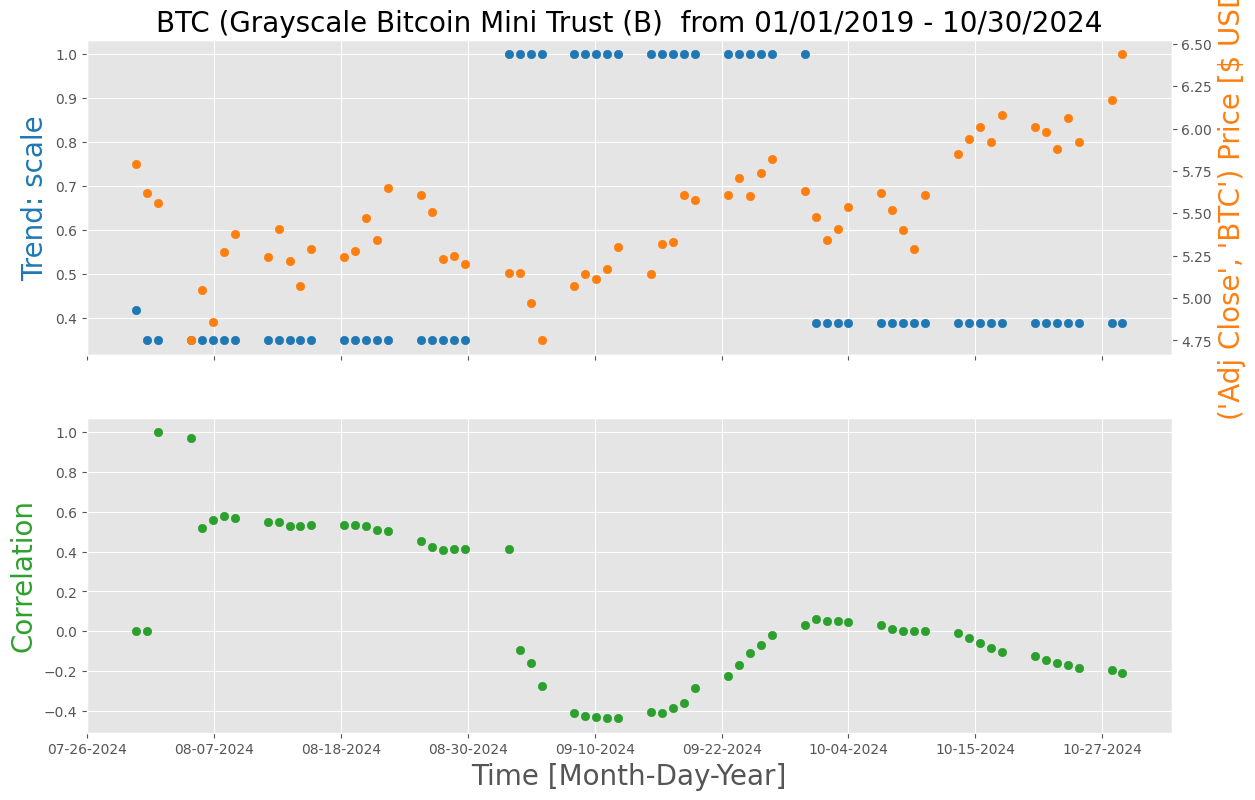

In [13]:
from pytrends import dailydata
import numpy as np
import matplotlib.pyplot as plt
import yfinance as fin
import datetime

#
######################################
# INPUTS
######################################
#
ticker = 'BTC' # which stock to search for
date_range = [1,1,2019,10,30,2024] # date range of interest, format: 'month,day,year'
fin_indx = 0 #Prices: 0=Open,1=High,2=Low,3=Close,4=Adj Close,5=Volume
trend_indx = 3 #Popularity: 0=unscaled 0-100, 1=monthly, 2=isPartial, 3=scaled

#
######################################
# DATE AND DATA HANDLING
######################################
#
start_t = datetime.datetime(date_range[2],date_range[0],date_range[1])
end_t   = datetime.datetime(date_range[5],date_range[3],date_range[4])

ticker_handle = fin.Ticker(ticker)
trends = dailydata.get_daily_data(ticker_handle.info.get('shortName').split(' ')[0],
                                  date_range[2],date_range[0],
                                  date_range[5],date_range[3])

fin_data = fin.download(ticker,start=start_t.strftime('%Y-%m-%d'),
                        end=end_t.strftime('%Y-%m-%d'))

#
######################################
# Time aligning routines
######################################
#
fin_keys = fin_data.keys() # keys for naming plotted finance data
trend_keys = trends.keys() # keys for naming plotted trends data

fin_x   = [ii.timestamp() for ii in fin_data.index] # formatting dates into timestamp for plotting
fin_y   = (fin_data.values)[:,fin_indx] # trend data to plot

trend_x = [ii.timestamp() for ii in trends.index] # formatting dates into timestamp for plotting
trend_y = (trends.values)[:,trend_indx] # trend data to plot

trend_start_indx = np.argmin(np.abs(np.subtract(trend_x,fin_x[0])))
trend_end_indx   = np.argmin(np.abs(np.subtract(trend_x,fin_x[-1])))
trend_y = [trend_y[np.argmin(np.abs(np.subtract(ii,trend_x)))] for ii in fin_x] # align trends + stock $
trend_x = [trend_x[np.argmin(np.abs(np.subtract(ii,trend_x)))] for ii in fin_x] # align trends + stock $
#
#######################################
# correlation calculation
#######################################
#
corr_xy_array = [0.0]
for ii in range(1,len(fin_y)):
    mean_x = np.nanmean(trend_y[0:ii])
    mean_y = np.nanmean(fin_y[0:ii])
    sigma_x = np.sqrt(np.nansum(np.power(trend_y[0:ii]-mean_x,2.0)))
    sigma_y = np.sqrt(np.nansum(np.power(fin_y[0:ii]-mean_y,2.0)))
    corr_xy = (np.nansum(np.multiply((np.subtract(trend_y[0:ii],mean_x)),
                                     np.subtract(fin_y[0:ii],mean_y))))\
              /(sigma_x*sigma_y)
    if np.isnan(corr_xy):
        corr_xy = 0.0
    corr_xy_array.append(corr_xy)

#
#######################################
# PLOTTING
#######################################
#
plt.style.use('ggplot')
fig,axs = plt.subplots(2,1,figsize=(14,9),sharex=True)

ax = axs[0]
ax.scatter(trend_x,trend_y,color=plt.cm.tab20(0))
ax2 = ax.twinx()
ax2.grid(False)
ax2.scatter(fin_x,fin_y,color=plt.cm.tab20(2))

ax.set_ylabel('Trend: '+(trend_keys[trend_indx].replace('_',' ')),color=plt.cm.tab20(0),fontsize=20)
ax2.set_ylabel(str(fin_keys[fin_indx]) + ' Price [$ USD]', color=plt.cm.tab20(2), fontsize=20)

ax3 = axs[1]
scat3 = ax3.scatter(fin_x,corr_xy_array,color=plt.cm.tab20(4)) # scatter trend data
ax3.set_ylabel('Correlation',
              fontsize=20,color=plt.cm.tab20(4))
x_ticks = ax3.get_xticks()
x_str_labels = [(datetime.datetime.fromtimestamp(ii)).strftime('%m-%d-%Y') for ii in x_ticks]
ax3.set_xticklabels(x_str_labels) # format dates on x-axis
ax3.set_xlabel('Time [Month-Day-Year]',fontsize=20)
ax2.set_xticklabels(x_str_labels)

ax.set_title(ticker+' ({}) '.format(ticker_handle.info.get('shortName'))+' from {} - {}'.format(start_t.strftime('%m/%d/%Y'),
                                        end_t.strftime('%m/%d/%Y')),
          fontsize=20)

plt.show() # show plot


Dogecoin:2019-01-01 2019-01-31
Dogecoin:2019-02-01 2019-02-28
Dogecoin:2019-03-01 2019-03-31
Dogecoin:2019-04-01 2019-04-30
Dogecoin:2019-05-01 2019-05-31
Dogecoin:2019-06-01 2019-06-30
Dogecoin:2019-07-01 2019-07-31
Dogecoin:2019-08-01 2019-08-31
Dogecoin:2019-09-01 2019-09-30
Dogecoin:2019-10-01 2019-10-31
Dogecoin:2019-11-01 2019-11-30
Dogecoin:2019-12-01 2019-12-31
Dogecoin:2020-01-01 2020-01-31
Dogecoin:2020-02-01 2020-02-29
Dogecoin:2020-03-01 2020-03-31
Dogecoin:2020-04-01 2020-04-30
Dogecoin:2020-05-01 2020-05-31
Dogecoin:2020-06-01 2020-06-30
Dogecoin:2020-07-01 2020-07-31
Dogecoin:2020-08-01 2020-08-31
Dogecoin:2020-09-01 2020-09-30
Dogecoin:2020-10-01 2020-10-31
Dogecoin:2020-11-01 2020-11-30
Dogecoin:2020-12-01 2020-12-31
Dogecoin:2021-01-01 2021-01-31
Dogecoin:2021-02-01 2021-02-28
Dogecoin:2021-03-01 2021-03-31
Dogecoin:2021-04-01 2021-04-30
Dogecoin:2021-05-01 2021-05-31
Dogecoin:2021-06-01 2021-06-30
Dogecoin:2021-07-01 2021-07-31
Dogecoin:2021-08-01 2021-08-31
Dogecoin

/usr/local/lib/python3.10/dist-packages/pytrends/dailydata.py:123: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  complete[f'{word}_monthly'].ffill(inplace=True)  # fill NaN values
[*********************100%***********************]  1 of 1 completed
<ipython-input-15-2eaf2cb029a8>:70: RuntimeWarning: invalid value encountered in scalar divide
  corr_xy = (np.nansum(np.multiply((np.subtract(trend_y[0:ii], mean_x)),
<ipython-input-15-2eaf2cb029a8>:100: UserWarning: set_ticklabels() should only be used with a fixed number of ticks

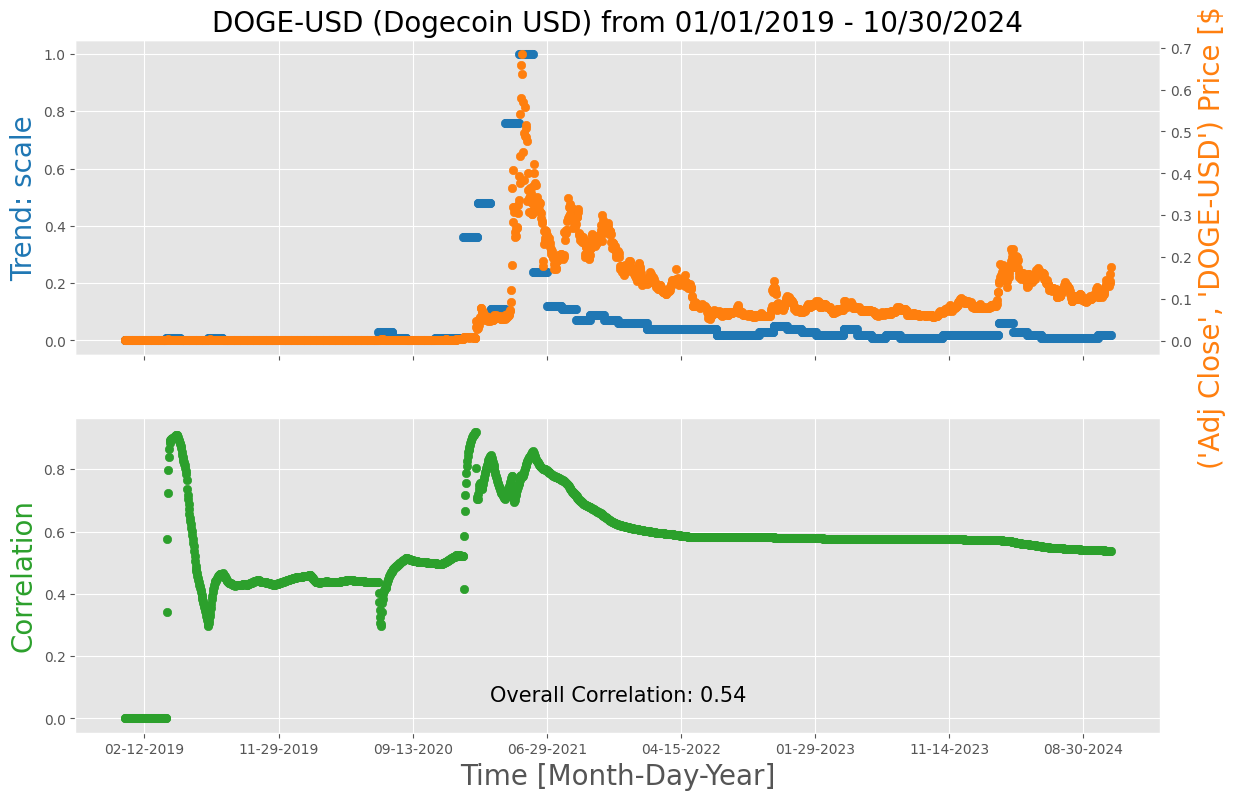

In [15]:
from pytrends import dailydata
import numpy as np
import matplotlib.pyplot as plt
import yfinance as fin
import datetime

#
######################################
# INPUTS
######################################
#
ticker = 'DOGE-USD'  # which stock to search for
date_range = [1, 1, 2019, 10, 30, 2024]  # date range of interest, format: 'month,day,year'
fin_indx = 0  # Prices: 0=Open,1=High,2=Low,3=Close,4=Adj Close,5=Volume
trend_indx = 3  # Popularity: 0=unscaled 0-100, 1=monthly, 2=isPartial, 3=scaled

#
######################################
# DATE AND DATA HANDLING
######################################
#
start_t = datetime.datetime(date_range[2], date_range[0], date_range[1])
end_t = datetime.datetime(date_range[5], date_range[3], date_range[4])

ticker_handle = fin.Ticker(ticker)
trends = dailydata.get_daily_data(ticker_handle.info.get('shortName').split(' ')[0],
                                  date_range[2], date_range[0],
                                  date_range[5], date_range[3])

fin_data = fin.download(ticker, start=start_t.strftime('%Y-%m-%d'),
                        end=end_t.strftime('%Y-%m-%d'))

#
######################################
# Time aligning routines
######################################
#
fin_keys = fin_data.keys()  # keys for naming plotted finance data
trend_keys = trends.keys()  # keys for naming plotted trends data

fin_x = [ii.timestamp() for ii in fin_data.index]  # formatting dates into timestamp for plotting
fin_y = (fin_data.values)[:, fin_indx]  # finance data to plot

trend_x = [ii.timestamp() for ii in trends.index]  # formatting dates into timestamp for plotting
trend_y = (trends.values)[:, trend_indx]  # trend data to plot

trend_start_indx = np.argmin(np.abs(np.subtract(trend_x, fin_x[0])))
trend_end_indx = np.argmin(np.abs(np.subtract(trend_x, fin_x[-1])))
trend_y = [trend_y[np.argmin(np.abs(np.subtract(ii, trend_x)))] for ii in fin_x]  # align trends + stock $
trend_x = [trend_x[np.argmin(np.abs(np.subtract(ii, trend_x)))] for ii in fin_x]  # align trends + stock $

#
#######################################
# Compute overall correlation
#######################################
#
overall_corr = np.corrcoef(fin_y, trend_y)[0, 1]

#
#######################################
# correlation calculation
#######################################
#
corr_xy_array = [0.0]
for ii in range(1, len(fin_y)):
    mean_x = np.nanmean(trend_y[0:ii])
    mean_y = np.nanmean(fin_y[0:ii])
    sigma_x = np.sqrt(np.nansum(np.power(trend_y[0:ii] - mean_x, 2.0)))
    sigma_y = np.sqrt(np.nansum(np.power(fin_y[0:ii] - mean_y, 2.0)))
    corr_xy = (np.nansum(np.multiply((np.subtract(trend_y[0:ii], mean_x)),
                                     np.subtract(fin_y[0:ii], mean_y)))) \
              / (sigma_x * sigma_y)
    if np.isnan(corr_xy):
        corr_xy = 0.0
    corr_xy_array.append(corr_xy)

#
#######################################
# PLOTTING
#######################################
#
plt.style.use('ggplot')
fig, axs = plt.subplots(2, 1, figsize=(14, 9), sharex=True)

ax = axs[0]
ax.scatter(trend_x, trend_y, color=plt.cm.tab20(0))
ax2 = ax.twinx()
ax2.grid(False)
ax2.scatter(fin_x, fin_y, color=plt.cm.tab20(2))

ax.set_ylabel('Trend: ' + (trend_keys[trend_indx].replace('_', ' ')), color=plt.cm.tab20(0), fontsize=20)
ax2.set_ylabel(str(fin_keys[fin_indx]) + ' Price [$ USD]', color=plt.cm.tab20(2), fontsize=20)

ax3 = axs[1]
scat3 = ax3.scatter(fin_x, corr_xy_array, color=plt.cm.tab20(4))  # scatter correlation data
ax3.set_ylabel('Correlation',
               fontsize=20, color=plt.cm.tab20(4))
x_ticks = ax3.get_xticks()
x_str_labels = [(datetime.datetime.fromtimestamp(ii)).strftime('%m-%d-%Y') for ii in x_ticks]
ax3.set_xticklabels(x_str_labels)  # format dates on x-axis
ax3.set_xlabel('Time [Month-Day-Year]', fontsize=20)
ax2.set_xticklabels(x_str_labels)

# Add overall correlation as text in the second subplot
ax3.text(0.5, 0.1, f'Overall Correlation: {overall_corr:.2f}',
         transform=ax3.transAxes, fontsize=15, ha='center')

ax.set_title(f"{ticker} ({ticker_handle.info.get('shortName')}) from {start_t.strftime('%m/%d/%Y')} - {end_t.strftime('%m/%d/%Y')}",
             fontsize=20)

plt.show()  # show plot


SPDR:2010-01-01 2010-01-31
SPDR:2010-02-01 2010-02-28
SPDR:2010-03-01 2010-03-31
SPDR:2010-04-01 2010-04-30
SPDR:2010-05-01 2010-05-31
SPDR:2010-06-01 2010-06-30
SPDR:2010-07-01 2010-07-31
SPDR:2010-08-01 2010-08-31
SPDR:2010-09-01 2010-09-30
SPDR:2010-10-01 2010-10-31
SPDR:2010-11-01 2010-11-30
SPDR:2010-12-01 2010-12-31
SPDR:2011-01-01 2011-01-31
SPDR:2011-02-01 2011-02-28
SPDR:2011-03-01 2011-03-31
SPDR:2011-04-01 2011-04-30
SPDR:2011-05-01 2011-05-31
SPDR:2011-06-01 2011-06-30
SPDR:2011-07-01 2011-07-31
SPDR:2011-08-01 2011-08-31
SPDR:2011-09-01 2011-09-30
SPDR:2011-10-01 2011-10-31
SPDR:2011-11-01 2011-11-30
SPDR:2011-12-01 2011-12-31
SPDR:2012-01-01 2012-01-31
SPDR:2012-02-01 2012-02-29
SPDR:2012-03-01 2012-03-31
SPDR:2012-04-01 2012-04-30
SPDR:2012-05-01 2012-05-31
SPDR:2012-06-01 2012-06-30
SPDR:2012-07-01 2012-07-31
SPDR:2012-08-01 2012-08-31
SPDR:2012-09-01 2012-09-30
SPDR:2012-10-01 2012-10-31
SPDR:2012-11-01 2012-11-30
SPDR:2012-12-01 2012-12-31
SPDR:2013-01-01 2013-01-31
S

/usr/local/lib/python3.10/dist-packages/pytrends/dailydata.py:123: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  complete[f'{word}_monthly'].ffill(inplace=True)  # fill NaN values
[*********************100%***********************]  1 of 1 completed
<ipython-input-19-e18b987d7b51>:70: RuntimeWarning: invalid value encountered in scalar divide
  corr_xy = (np.nansum(np.multiply((np.subtract(trend_y[0:ii], mean_x)),
<ipython-input-19-e18b987d7b51>:103: UserWarning: set_ticklabels() should only be used with a fixed number of ticks

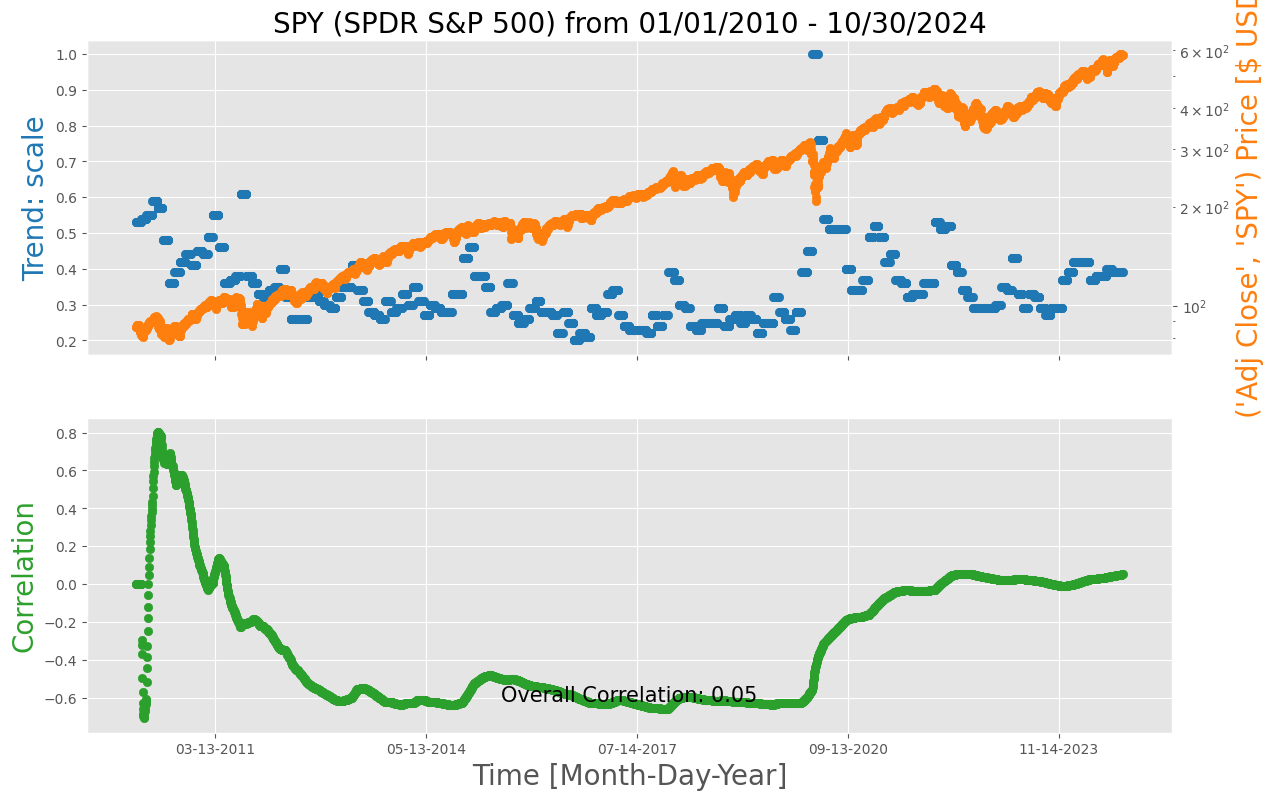

In [19]:
from pytrends import dailydata
import numpy as np
import matplotlib.pyplot as plt
import yfinance as fin
import datetime

#
######################################
# INPUTS
######################################
#
ticker = 'SPY'  # which stock to search for
date_range = [1, 1, 2010, 10, 30, 2024]  # date range of interest, format: 'month,day,year'
fin_indx = 0  # Prices: 0=Open,1=High,2=Low,3=Close,4=Adj Close,5=Volume
trend_indx = 3  # Popularity: 0=unscaled 0-100, 1=monthly, 2=isPartial, 3=scaled

#
######################################
# DATE AND DATA HANDLING
######################################
#
start_t = datetime.datetime(date_range[2], date_range[0], date_range[1])
end_t = datetime.datetime(date_range[5], date_range[3], date_range[4])

ticker_handle = fin.Ticker(ticker)
trends = dailydata.get_daily_data(ticker_handle.info.get('shortName').split(' ')[0],
                                  date_range[2], date_range[0],
                                  date_range[5], date_range[3])

fin_data = fin.download(ticker, start=start_t.strftime('%Y-%m-%d'),
                        end=end_t.strftime('%Y-%m-%d'))

#
######################################
# Time aligning routines
######################################
#
fin_keys = fin_data.keys()  # keys for naming plotted finance data
trend_keys = trends.keys()  # keys for naming plotted trends data

fin_x = [ii.timestamp() for ii in fin_data.index]  # formatting dates into timestamp for plotting
fin_y = (fin_data.values)[:, fin_indx]  # finance data to plot

trend_x = [ii.timestamp() for ii in trends.index]  # formatting dates into timestamp for plotting
trend_y = (trends.values)[:, trend_indx]  # trend data to plot

trend_start_indx = np.argmin(np.abs(np.subtract(trend_x, fin_x[0])))
trend_end_indx = np.argmin(np.abs(np.subtract(trend_x, fin_x[-1])))
trend_y = [trend_y[np.argmin(np.abs(np.subtract(ii, trend_x)))] for ii in fin_x]  # align trends + stock $
trend_x = [trend_x[np.argmin(np.abs(np.subtract(ii, trend_x)))] for ii in fin_x]  # align trends + stock $

#
#######################################
# Compute overall correlation
#######################################
#
overall_corr = np.corrcoef(fin_y, trend_y)[0, 1]

#
#######################################
# correlation calculation
#######################################
#
corr_xy_array = [0.0]
for ii in range(1, len(fin_y)):
    mean_x = np.nanmean(trend_y[0:ii])
    mean_y = np.nanmean(fin_y[0:ii])
    sigma_x = np.sqrt(np.nansum(np.power(trend_y[0:ii] - mean_x, 2.0)))
    sigma_y = np.sqrt(np.nansum(np.power(fin_y[0:ii] - mean_y, 2.0)))
    corr_xy = (np.nansum(np.multiply((np.subtract(trend_y[0:ii], mean_x)),
                                     np.subtract(fin_y[0:ii], mean_y)))) \
              / (sigma_x * sigma_y)
    if np.isnan(corr_xy):
        corr_xy = 0.0
    corr_xy_array.append(corr_xy)

#
#######################################
# PLOTTING
#######################################
#
plt.style.use('ggplot')
fig, axs = plt.subplots(2, 1, figsize=(14, 9), sharex=True)

ax = axs[0]
ax.scatter(trend_x, trend_y, color=plt.cm.tab20(0))
ax2 = ax.twinx()
ax2.grid(False)
ax2.scatter(fin_x, fin_y, color=plt.cm.tab20(2))

# Set the y-axis of stock prices to logarithmic scale
ax2.set_yscale('log')

ax.set_ylabel('Trend: ' + (trend_keys[trend_indx].replace('_', ' ')), color=plt.cm.tab20(0), fontsize=20)
ax2.set_ylabel(str(fin_keys[fin_indx]) + ' Price [$ USD]', color=plt.cm.tab20(2), fontsize=20)

ax3 = axs[1]
scat3 = ax3.scatter(fin_x, corr_xy_array, color=plt.cm.tab20(4))  # scatter correlation data
ax3.set_ylabel('Correlation',
               fontsize=20, color=plt.cm.tab20(4))
x_ticks = ax3.get_xticks()
x_str_labels = [(datetime.datetime.fromtimestamp(ii)).strftime('%m-%d-%Y') for ii in x_ticks]
ax3.set_xticklabels(x_str_labels)  # format dates on x-axis
ax3.set_xlabel('Time [Month-Day-Year]', fontsize=20)
ax2.set_xticklabels(x_str_labels)

# Add overall correlation as text in the second subplot
ax3.text(0.5, 0.1, f'Overall Correlation: {overall_corr:.2f}',
         transform=ax3.transAxes, fontsize=15, ha='center')

ax.set_title(f"{ticker} ({ticker_handle.info.get('shortName')}) from {start_t.strftime('%m/%d/%Y')} - {end_t.strftime('%m/%d/%Y')}",
             fontsize=20)

plt.show()  # show plot
